In [31]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
import os
import re
import tensorflow as tf
from sklearn.cross_validation import train_test_split
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [3]:
def ImportData(folder):
    file_list = []
    file_list.append(pd.read_table('./Mesh/meshcoord.txt',sep="\s+"))
    for filename in os.listdir(folder):
        if filename.endswith(".txt"): 
            file_list.append(pd.read_csv(os.path.join(folder, filename),sep="\s+"))
    df = pd.DataFrame()
    df = pd.concat(file_list,axis=1)
    df = df.drop(['vz','v','ccz'],axis=1)
    variables = {}
    for col in df.columns:
        variables[col],ccx,ccy = np.histogram2d(df.ccx,df.ccy,weights=df[col],bins=(225,200))
        variables[col] = np.vstack((np.zeros(200),variables[col],np.zeros(200)))
        variables[col] = np.hstack((np.zeros((227,1)),variables[col],np.zeros((227,1))))
        variables[col] = variables[col].T[::-1]
        
    o = np.zeros((225,200))
    xg, yg = np.meshgrid(np.arange(100,125,1),np.arange(0,50,1))
    for i in np.arange(100,125,1):
        for j in np.arange(0,50,1):
            o[i,j] = 1
    variables['o'] = o
    variables['o'] = np.vstack((np.ones(200)+5,variables['o'],np.ones(200)+2))
    variables['o'] = np.hstack((np.ones((227,1)),variables['o'],np.ones((227,1))))
    variables['o'] = variables['o'].T[::-1]
    
    dataconv = variables.copy()
    
    variables.pop('ccx',None)
    variables.pop('ccy',None)
    
    plist = []
    for i in np.arange(1,201,1):
        for j in np.arange(1,226,1):
            di = {}
            for col in variables:
                di.update({col+'in':variables[col][i,j],col+'right':variables[col][i,j-1],
                              col+'left':variables[col][i,j+1],col+'up':variables[col][i-1,j],
                              col+'down':variables[col][i+1,j]})
                di.update({'ccx':ccx[j-1],'ccy':ccy[-i]})
            plist.append(di)
    data= pd.DataFrame(plist)
    
    return data,dataconv


In [41]:
folder = os.getcwd()+'/OpenFOAMfiles/turbulent/machineRANS/'
data = {}
dataconv = {}
for filename in os.listdir(folder):
    if filename.startswith("0."): 
        data[filename],dataconv[filename] = ImportData(folder+filename) 

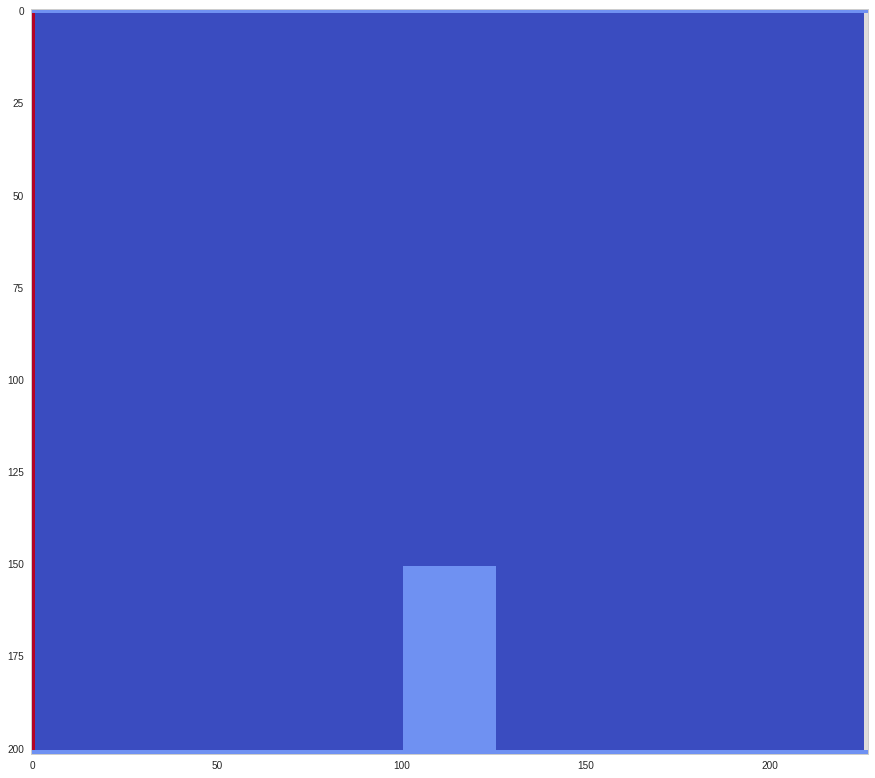

In [25]:
plt.figure(figsize=(15,15))
plt.imshow(dataconv['0.15']['o'],cmap='coolwarm')

In [33]:
datainput   = pd.concat([data['0.1']],ignore_index=True)
dataoutput  = pd.concat([data['0.1']],ignore_index=True).pressurein.copy()
datainput  = datainput.drop(['ccx','ccy','pressurein','pressureleft','pressureright',
                            'pressureup','pressuredown'],axis=1).copy()

In [34]:
clf = DecisionTreeRegressor(random_state=52)
clf = clf.fit(datainput,dataoutput)

In [35]:
print(r2_score(dataoutput,clf.predict(datainput)))

1.0


In [36]:
data.keys()

dict_keys(['0.1', '0.11', '0.15', '0.16', '0.19'])

In [38]:
datainput   = pd.concat([data['0.19']],ignore_index=True)
dataoutput  = pd.concat([data['0.19']],ignore_index=True).pressurein.copy()
datainput  = datainput.drop(['ccx','ccy','pressurein','pressureleft','pressureright',
                            'pressureup','pressuredown'],axis=1).copy()
clf = DecisionTreeRegressor(random_state=52)
clf = clf.fit(datainput,dataoutput)

In [39]:
print(r2_score(dataoutput,clf.predict(datainput)))

1.0
